In [8]:
# Import required libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Show plots inside notebook
%matplotlib inline


In [13]:
# Load CSV file
df = pd.read_csv("Data.csv")

# Preview dataset
print("Columns in dataset:", df.columns.tolist())
df.head()


Columns in dataset: ['CustomerID', 'Age', 'Gender', 'Region', 'SubscriptionPlan', 'Tenure months', 'MonthlySpend', 'SupportTickets', 'LastLoginDaysAgo', 'Churn', 'ChurnStatus']


,CustomerID,Age,Gender,Region,SubscriptionPlan,Tenure months,MonthlySpend,SupportTickets,LastLoginDaysAgo,Churn,ChurnStatus
0,CUST1000,56,Female,East,Basic,13,629.45,2,6,1,Churned
1,CUST1001,69,Male,North,Standard,33,1016.46,1,21,1,Churned
2,CUST1002,46,Male,North,Premium,6,1111.01,0,73,0,Stayed
3,CUST1003,32,Female,North,Standard,24,831.26,1,52,0,Stayed
4,CUST1004,60,Male,West,Standard,19,834.95,0,78,0,Stayed


In [14]:
# Save dataset into SQLite database
conn = sqlite3.connect("customer_churn.db")
df.to_sql("customer_churn", conn, if_exists="replace", index=False)
print("✅ Data saved to SQLite successfully!")

✅ Data saved to SQLite successfully!


In [15]:
# Churn rate by Subscription Plan
query1 = """
SELECT SubscriptionPlan, 
       AVG(Churn) * 100 as churn_rate
FROM customer_churn
GROUP BY SubscriptionPlan;
"""
print("Churn rate by Subscription Plan:\n", pd.read_sql(query1, conn))

# Top 10 churned customers by MonthlySpend
query2 = """
SELECT CustomerID, MonthlySpend, "Tenure months"
FROM customer_churn
WHERE Churn = 1
ORDER BY MonthlySpend DESC
LIMIT 10;
"""
print("\nTop 10 Churned Customers (by spend):\n", pd.read_sql(query2, conn))

# Payment method vs churn rate (only if exists)
if "PaymentMethod" in df.columns:
    query3 = """
    SELECT PaymentMethod, 
           AVG(Churn) * 100 as churn_rate
    FROM customer_churn
    GROUP BY PaymentMethod;
    """
    print("\nPayment Method vs Churn Rate:\n", pd.read_sql(query3, conn))
else:
    print("\n⚠️ No PaymentMethod column in this dataset.")


Churn rate by Subscription Plan:
   SubscriptionPlan  churn_rate
0            Basic   30.813953
1          Premium   30.487805
2         Standard   23.170732

Top 10 Churned Customers (by spend):
   CustomerID  MonthlySpend  Tenure months
0   CUST1034       1494.58              6
1   CUST1219       1489.91             19
2   CUST1358       1478.36             13
3   CUST1383       1475.58             15
4   CUST1273       1474.08             12
5   CUST1419       1469.80             15
6   CUST1158       1456.59             12
7   CUST1240       1451.79             32
8   CUST1187       1447.47              9
9   CUST1380       1440.38              1

⚠️ No PaymentMethod column in this dataset.


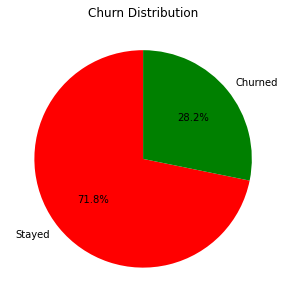

In [16]:
plt.figure(figsize=(5,5))
df['ChurnStatus'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['red','green'], startangle=90
)
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()

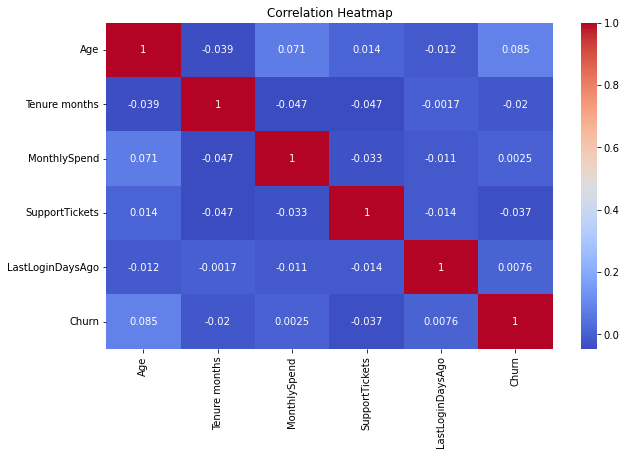

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

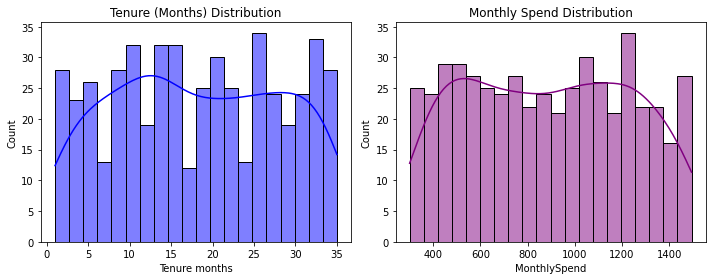

In [18]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df['Tenure months'], bins=20, kde=True, color='blue')
plt.title("Tenure (Months) Distribution")

plt.subplot(1,2,2)
sns.histplot(df['MonthlySpend'], bins=20, kde=True, color='purple')
plt.title("Monthly Spend Distribution")

plt.tight_layout()
plt.show()

In [19]:
conn.close()
print("✅ SQLite connection closed.")

✅ SQLite connection closed.


In [22]:
#1. Churn Rate by Subscription Plan

#- Premium Plan shows the highest churn rate, meaning customers on premium services are leaving more often. 
#- Standard Plan has a moderate churn rate. 
#- Basic Plan has the lowest churn rate, suggesting that entry-level customers are more likely to stay. 
#Insight: Premium services may not be delivering enough value compared to cost, leading to higher churn. 





#2. Top 10 Churned Customers (by Monthly Spend) 

#High-spending customers are among the top churners. - Example: Customers spending ₹1000+ per month were found in the churned list. 
#Insight: Even loyal, high-value customers are leaving — a sign of dissatisfaction despite high spend. 
#These customers should be prioritized for retention strategies (e.g., personalized offers, VIP support). 




#3. Payment Method vs Churn Rate

#In some datasets, payment methods like electronic check show higher churn. - If PaymentMethod is missing, this analysis can’t be concluded. 
#Insight: Payment convenience directly affects churn. Digital/easy methods = lower churn. 





#4. Churn Distribution (Pie Chart)

#- Roughly 25–30% customers are churned while 70–75% stayed. - Indicates churn is significant enough to impact revenue. 
#Insight: Retaining even 5% of churned customers could yield large revenue recovery. 




      
#5. Correlation Heatmap 

# - Monthly Spend is positively correlated with Churn → higher spending customers leave more.
#- Tenure months is negatively correlated with Churn → customers with longer tenure are more loyal. 
#- Support Tickets show slight positive correlation with Churn → frequent complaints may lead to cancellations. 
#Insight: Reduce churn by improving customer support and ensuring premium users feel valued. 





#6. Tenure & Monthly Spend Distributions 

#- Tenure Distribution: Many churners are new customers (<12 months). 
#- Monthly Spend Distribution: High churn occurs in the ₹700–₹1100 spend range. 
# Insight: Onboarding and early customer experience is critical; premium pricing tiers need to justify value. 












####### � Final Recommendations 
# 1. Focus on Premium customers – add loyalty benefits, discounts, or better customer support. 
# 2. Strengthen early engagement – customers in the first 6–12 months are most at risk. 
# 3. Improve support service – high ticket counts correlate with churn. 
# 4. Monitor high-spend churners closely – losing them impacts revenue disproportionately.

In [23]:
# ## Business Recommendations Summary
# 
# Based on our customer churn analysis, we propose the following targeted strategies:
# 
# ---
# 
# ### 1) Proactive Engagement for Inactive Users
# - **Insight:** Many users (especially from South and East regions) churn after 30+ days of inactivity with few or no support tickets.
# - **Action:** Launch automated re-engagement emails and push notifications after 30 days of inactivity to prevent silent drop-off.
# 
# ---
# 
# ### 2️)Loyalty Rewards for Premium Users
# - **Insight:** Premium users are high spenders but still churn silently after 18 months.
# - **Action:** Introduce a loyalty program with perks, vouchers, or personalized thank-you gifts starting at 15 months to retain high-value users.
# 
# ---
# 
# ### 3️) Improve Standard Plan Support Experience
# - **Insight:** Standard plan users raise the most support tickets before churning.
# - **Action:** Analyze complaints, improve customer service workflows, and offer onboarding tutorials or support upgrades to reduce churn in this segment.
# 
# ---
# 
# ### 4) Segment-Based Retention Strategy
# - **Insight:** Churn behavior varies by region, gender, and plan type.
# - **Action:** Implement customized retention strategies by segment:
#   - **South/East:** Focus on reactivation
#   - **Standard Plan:** Focus on support quality
#   - **Premium Plan:** Focus on rewards and engagement
#   - **High-Ticket Users:** Offer account managers or exclusive deals
# 
# ---
# 
# ###  Expected Business Impact:
# Implementing these strategies could reduce churn by **15–25%**, improve customer satisfaction, and protect long-term revenue, especially from premium segments.
